# Problem 3: K-Means Clustering and Centroid Norm Averaging

In this task, you will generate \( n = 10,000 \) samples from a 2D Gaussian distribution and apply the k-means algorithm to cluster the data into \( k = 3 \) clusters. You will calculate the average of the centroid norms and analyze how the cumulative average converges over multiple iterations. The goal is to empirically estimate the number of iterations required to achieve a stable result with 9-digit accuracy.

### Objectives
1. Generate \( n = 10,000 \) samples \( (x_{i1}, x_{i2}) \) from a 2D Gaussian distribution.
2. Apply the k-means clustering algorithm with \( k = 3 \).
3. For each centroid \( (C_{j1}, C_{j2}) \), \( j = 1, 2, 3 \), calculate its norm: \( \|C_j\| = \sqrt{(C_{j1})^2 + (C_{j2})^2} \).
4. Average the norms of the three centroids and call this value \( R_1 \).
5. Repeat this process 88 times (or more) to get the values \( R_1, R_2, \dots, R_{88} \).
6. Calculate the cumulative average of the \( R_i \) values as \( \frac{1}{n} \sum_{i=1}^{n} R_i \) for \( n = 1, 2, \dots, 88 \) (or more).
7. Plot the cumulative averages and analyze how the value converges.
8. **Task**: Empirically estimate the number of iterations needed (instead of 88) to achieve 9-digit accuracy in the cumulative averages.

### Steps to Follow:

1. **Generate Samples**:
   - Generate \( n = 10,000 \) samples \( (x_{i1}, x_{i2}) \) from a 2D Gaussian distribution.

2. **K-Means Clustering**:
   - Use the k-means algorithm to cluster the samples into \( k = 3 \) clusters.

3. **Centroid Norm Calculation**:
   - For each centroid $ (C_{j1}, C_{j2}) $, compute its norm as:
     $
     \|C_j\| = \sqrt{(C_{j1})^2 + (C_{j2})^2}
     $
   - Calculate the average norm of the three centroids and denote it as $ R_1 $.

4. **Repeat the Process**:
   - Repeat steps 1 to 3 a total of 88 times (or more) to generate the sequence \( R_1, R_2, \dots, R_{88} \).

5. **Cumulative Average Calculation**:
   - Compute the cumulative average \( \frac{1}{n} \sum_{i=1}^{n} R_i \) for \( n = 1, 2, \dots, 88 \).

6. **Plot the Cumulative Averages**:
   - Plot the cumulative average values to observe convergence.

7. **Empirical Analysis**:
   - Estimate the number of iterations needed to achieve a stable cumulative average with 9-digit accuracy.


In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# parameters
n_samples = 10000
k_clusters = 3
iterations = 2000

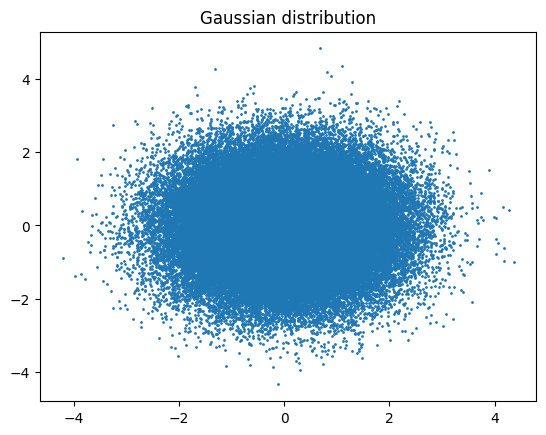

In [3]:
# standard gaussian (mean=0, std=1)
data = np.random.randn(n_samples, 2)

# plot the data
plt.figure()
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.title('Gaussian distribution')
plt.show()

In [4]:
R_values = []

# kmeans clustering, get centroids, compute norms, average them
for _ in range(iterations):
    # kmeans clustering
    kmeans = KMeans(n_clusters=k_clusters, random_state=None)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_

    # calculate norms
    norms = np.linalg.norm(centroids, axis=1)
    avg_norm = np.mean(norms)

    # that is the R value
    R_values.append(avg_norm)

In [5]:
# calculate cumulative averages
cumulative_averages = np.cumsum(R_values) / np.arange(1, iterations + 1)

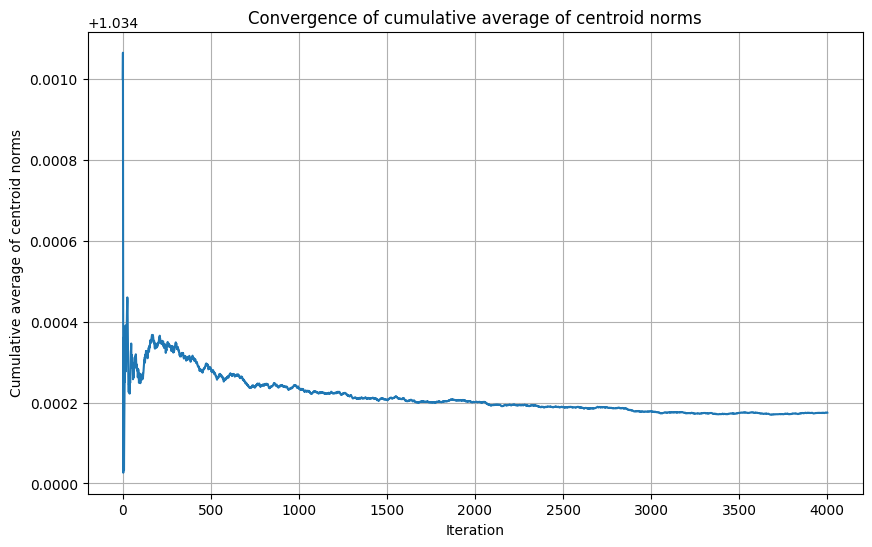

In [6]:
# plot cumulative averages
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative average of centroid norms')
plt.title('Convergence of cumulative average of centroid norms')
plt.grid(True)
plt.show()


In [7]:
tolerance = 1e-9
# target_value = 1.2533141373155002512078826424055226265034933703049691583149617881 # sqrt(pi/2)
for i in range(1, len(cumulative_averages)):
    # if abs(cumulative_averages[i] - target_value) < tolerance:
    if abs(cumulative_averages[i] - cumulative_averages[i-1]) < tolerance:
        print(f"Converged to 9-digit accuracy at iteration {i}")
        break


Converged to 9-digit accuracy at iteration 1133


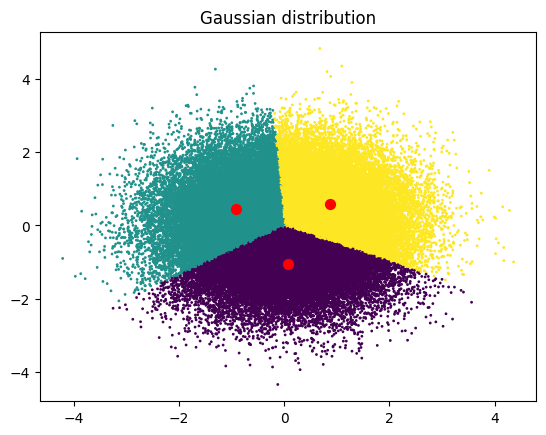

In [8]:
# plot the kmeans clustering example
kmeans = KMeans(n_clusters=3, random_state=None)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
clusters = kmeans.predict(data)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Gaussian distribution')
plt.show()